In [164]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

### 2개의 well seperable한 Gaussian distribution 시뮬레이션 데이터 구성하기 (numpy.random.normal 활용) - 2차원, 3차원, 4차원

In [165]:
def separable_dataset_2d():
    n, dim = 1000, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    # C = np.array([[0., -0.23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

In [166]:
def separable_dataset_3d():
    n, dim = 1000, 2
    np.random.seed(0)
    C = np.array([[0., -0.23, 0.01], [0.83, .23, 0.99]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

In [167]:
def separable_dataset_4d():
    n, dim = 1000, 2
    np.random.seed(0)
    C = np.array([[0., -0.23, 0.01, -0.11], [0.83, .23, 0.99, 0.55]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1, 1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

### 위 시뮬레이션 데이터에 Linear Discriminant Analaysis, Logistic regression, QDA, Naive Bayes 돌려보기

#### Logistic regression
특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교합니다.</br>
함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고 0보다 크면 +1이라고 예측합니다</br>
분류용 선형 모델에서는 결정 경계가 입력의 선형 함수</br>
LogisticRegression은 이름에 ‘Regression(회귀)’이 들어가지만 회귀 알고리즘이 아니라 분류 알고리즘</br>
LogitsticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C입니다. C의 값이 높아지면 규제가 감소합니다.</br>
다시 말해 매개변수로 높은 C 값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려 하고,</br> 
반면에 C 값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만듭니다.</br>

#### Naive bayes
나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문입니다</br>
GaussianNB는 연속적인 어떤 데이터에도 적용할 수 있고 BernoulliNB는 이진 데이터를,</br>
MultinomialNB는 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트로, 예를 들면 문장에 나타난 단어의 횟수입니다)에 적용됩니다.</br>
BernoulliNB, MultinomialNB는 대부분 텍스트 데이터를 분류할 때 사용합니다.

### Train/Test split 후 5 fold cross-validation에서 정확도와 각각의 coeff, coeff의 분산 등을 plot으로 그리기.

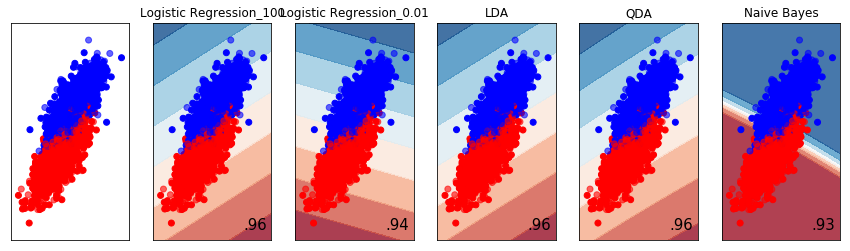

In [168]:
h = .02  # step size in the mesh

names = ["Logistic Regression_100", "Logistic Regression_0.01", "LDA", "QDA", "Naive Bayes"]
classifiers = [
    LogisticRegression(C=100),
    LogisticRegression(C=0.01),
    LDA(),
    QDA(),
    GaussianNB()
    ]

datasets = [separable_dataset_2d()]

figure = plt.figure(figsize=(12, 4))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

#### seperable한 시뮬레이션 데이터에선 Logistic Regression, LDA, QD가 동일하게 높은 score를 보인다. </br>

##### Linear Discriminant Analaysis & Quadratic Discriminant Analaysis
LDA는 데이터 분포를 학습해 결정경계(Decision boundary)를 만들어 데이터를 분류(classification)하는 모델 </br>
사영 후 두 범주의 중심(평균)이 서로 멀도록, 그 분산이 작도록 하는 직선을 찾도록 해줍니다</br>
LDA의 중요한 가정은 데이터 분포가 다변량 정규분포(multivariate normal distribution)을 따른다</br>
다변량 정규분포의 파라메터는 평균(벡터)와 공분산(행렬)입니다 </br>
각 범주의 공분산행렬이 동일하다는 가정을 하고 식을 정리하면 Ax+b=0 꼴의 선형식이 된다 </br>
그러나, 공분산이 다르다고 놓고 식을 정리하면 Ax2+Bx+c=0 꼴의 Quadratic form이 됩니다

In [169]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold

h = .02  # step size in the mesh

names = ["Logistic Regression", "Ridge", "Lasso", "LDA", "QDA", "Naive Bayes"]
classifiers = [
    LogisticRegression(),
    Ridge(),
    Lasso(alpha=0.01, max_iter=100000),
    LDA(),
    QDA(),
    GaussianNB()
]

datasets = [separable_dataset_2d()
            , separable_dataset_3d()
            , separable_dataset_4d()
            ]

i = 2
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
    print()
    print("seperable_dataset_%1dd" % (i))
    i += 1
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        scores = cross_val_score(clf, X_test, y_test, cv=5)
        print("classifiers: %s, score: %.2f" % (name, scores.mean()))


seperable_dataset_2d
classifiers: Logistic Regression, score: 0.96
classifiers: Ridge, score: 0.74
classifiers: Lasso, score: 0.74
classifiers: LDA, score: 0.96
classifiers: QDA, score: 0.96
classifiers: Naive Bayes, score: 0.93

seperable_dataset_3d
classifiers: Logistic Regression, score: 0.97
classifiers: Ridge, score: 0.84
classifiers: Lasso, score: 0.76
classifiers: LDA, score: 0.97
classifiers: QDA, score: 1.00
classifiers: Naive Bayes, score: 0.90

seperable_dataset_4d
classifiers: Logistic Regression, score: 0.98
classifiers: Ridge, score: 0.85
classifiers: Lasso, score: 0.76
classifiers: LDA, score: 0.98
classifiers: QDA, score: 1.00
classifiers: Naive Bayes, score: 0.87


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn

In [170]:
X, y = separable_dataset_2d()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
lr = LogisticRegression().fit(X_train, y_train)
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

''''intercept_ 속성은 항상 실수float 값 하나지만, coef_ 속성은 각 입력 특성에 하나씩 대응되는 NumPy 배열'''

lr.coef_:[[-1.35441148  9.05546622]]
lr.intercept_:[-3.90657018]
훈련 세트 점수: 0.96
테스트 세트 점수: 0.96


"'intercept_ 속성은 항상 실수float 값 하나지만, coef_ 속성은 각 입력 특성에 하나씩 대응되는 NumPy 배열"

In [171]:
lda = LDA().fit(X_train, y_train)
print("lda.coef_:{}".format(lda.coef_))
print("lda.intercept_:{}".format(lda.intercept_))

print("훈련 세트 점수: {:.2f}".format(lda.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lda.score(X_test, y_test)))

lda.coef_:[[-2.57921649 14.65011217]]
lda.intercept_:[-6.19668904]
훈련 세트 점수: 0.96
테스트 세트 점수: 0.96


In [172]:
qda = QDA().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(qda.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(qda.score(X_test, y_test)))

훈련 세트 점수: 0.96
테스트 세트 점수: 0.96


In [173]:
gnb = GaussianNB().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(gnb.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(gnb.score(X_test, y_test)))

훈련 세트 점수: 0.91
테스트 세트 점수: 0.91


### class가 2개이면서 겹치는 Gaussian distribution 시뮬레이션 데이터 구성하기- 2차원, 3차원, 4차원


In [174]:
def non_separable_dataset_2d():
    n, dim = 1000, 2
    np.random.seed(0)
    C = np.random.rand(2,2)
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([0.01, 0.01])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def non_separable_dataset_3d():
    n, dim = 1000, 2
    np.random.seed(0)
    C = np.random.rand(2,3)
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([0.01, 0.01, 0.01])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def non_separable_dataset_4d():
    n, dim = 1000, 2
    np.random.seed(0)
    C = np.random.rand(2,4)
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([0.01, 0.01, 0.01, 0.01])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


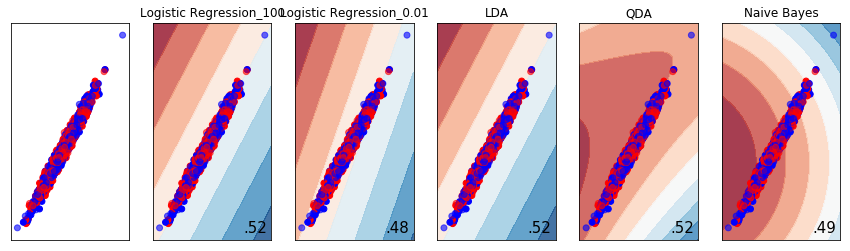

In [175]:
h = .02  # step size in the mesh

names = ["Logistic Regression_100", "Logistic Regression_0.01", "LDA", "QDA", "Naive Bayes"]
classifiers = [
    LogisticRegression(C=100),
    LogisticRegression(C=0.01),
    LDA(),
    QDA(),
    GaussianNB()
]

datasets = [non_separable_dataset_2d()]

figure = plt.figure(figsize=(12, 4))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()



In [176]:
from sklearn.cross_validation import cross_val_score

h = .02  # step size in the mesh

names = ["Logistic Regression", "Ridge", "Lasso", "LDA", "QDA", "Naive Bayes"]
classifiers = [
    LogisticRegression(),
    Ridge(),
    Lasso(alpha=0.01, max_iter=100000),
    LDA(),
    QDA(),
    GaussianNB()
]

datasets = [non_separable_dataset_2d()
    , non_separable_dataset_3d()
    , non_separable_dataset_4d()
            ]

i = 2
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
    print()
    print("seperable_dataset_%1dd" % (i))
    i += 1
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        scores = cross_val_score(clf, X_test, y_test, cv=5)
        ax.set_title(name)
        print("classifiers: %s, score: %.2f" % (name, scores.mean()))
    


seperable_dataset_2d
classifiers: Logistic Regression, score: 0.50
classifiers: Ridge, score: -0.02
classifiers: Lasso, score: -0.02
classifiers: LDA, score: 0.50
classifiers: QDA, score: 0.49
classifiers: Naive Bayes, score: 0.54

seperable_dataset_3d
classifiers: Logistic Regression, score: 0.44
classifiers: Ridge, score: -0.01
classifiers: Lasso, score: -0.00
classifiers: LDA, score: 0.44
classifiers: QDA, score: 1.00
classifiers: Naive Bayes, score: 0.49

seperable_dataset_4d
classifiers: Logistic Regression, score: 0.51
classifiers: Ridge, score: -0.02
classifiers: Lasso, score: -0.02
classifiers: LDA, score: 0.51
classifiers: QDA, score: 1.00
classifiers: Naive Bayes, score: 0.48


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn

In [177]:
X, y = non_separable_dataset_2d()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
lr = LogisticRegression().fit(X_train, y_train)
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
print()
lda = LDA().fit(X_train, y_train)
print("lda.coef_:{}".format(lda.coef_))
print("lda.intercept_:{}".format(lda.intercept_))
print("훈련 세트 점수: {:.2f}".format(lda.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lda.score(X_test, y_test)))
print()
qda = QDA().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(qda.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(qda.score(X_test, y_test)))
print()
gnb = GaussianNB().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(gnb.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(gnb.score(X_test, y_test)))

lr.coef_:[[ 0.28688498 -0.26749097]]
lr.intercept_:[0.01763526]
훈련 세트 점수: 0.50
테스트 세트 점수: 0.48



lda.coef_:[[ 0.35221082 -0.32648027]]
lda.intercept_:[0.01752767]
훈련 세트 점수: 0.51
테스트 세트 점수: 0.48

훈련 세트 점수: 0.51
테스트 세트 점수: 0.46

훈련 세트 점수: 0.50
테스트 세트 점수: 0.49


### Naive Bayes가 성능이 나올 수 없는 시뮬레이션 데이터 구성하고 각각의 모델을 피팅하여 비교해보기

#### 모든 특성 값은 서로 독립임을 가정한다</br>
나이브 베이즈 분류기에서 특성들 사이에서 발생할 수 있는 연관성이 없음을 가정하고 각각의 특성들이 확률에 독립적으로 기여 하는 것으로 간주한다</br>
따라서, covariance가 동일/다른 데이터셋을 준비</br>


In [178]:
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    # np.dot(np.random.randn(n, dim), C)]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    # np.dot(np.random.randn(n, dim), C.T)]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

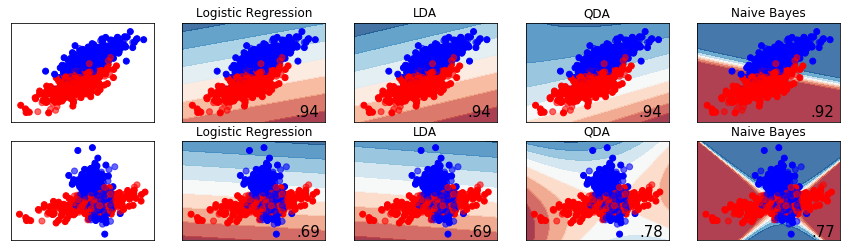

In [179]:
h = .02  # step size in the mesh

names = ["Logistic Regression", "LDA", "QDA", "Naive Bayes"]
classifiers = [
    LogisticRegression(),
    LDA(),
    QDA(),
    GaussianNB()
]

datasets = [dataset_fixed_cov(),
            dataset_cov()]

figure = plt.figure(figsize=(12, 4))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

#### 윗줄 경우 동일한 covariance 경우, 아래줄은 다른 covariance 적용</br>
모든 모델에서 전체적으로 높은 score를 보이나 covariance가 동일한 경우 Naive Bayes 모델이 가장 낮은 score을 보인다</br>
반면 covariance가 다른 경우, Naive Bayes 모델은 Logistic Regression, LDA에 비해 높은 score를 보인다